nameStrct[0] = nlnr0_IO_82
nameStrct[1] = nlnr1_IO_82
lattices[nlnr0_IO_82] = /home/vagrant/jupyter/eidelyur/iota/lattice_1IO_center.madx
lattices[nlnr1_IO_82] = /home/vagrant/jupyter/eidelyur/iota/lattice_1IO_center.madx

These distributions were constructed using 'synergia.optics.generated_bunch_transverse' method:



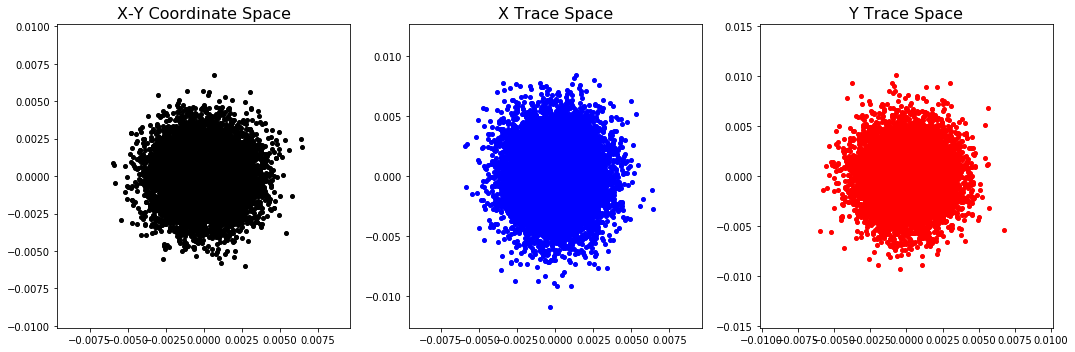

Constructed bunch with 10000 macroparticles, having mean H: 9.73999902031e-06 and std: 0.001352084899%
Read  10000  particles
Constructed bunch with 10000 macroparticles, having mean H: 9.73999902031e-06 and std: 0.001352084899%
Read  10000  particles
Before main simulation

These distributions are initial for pulling through the structures and were constructed using 'elliptic_beam6d.toyellipticalbeam6D' method:



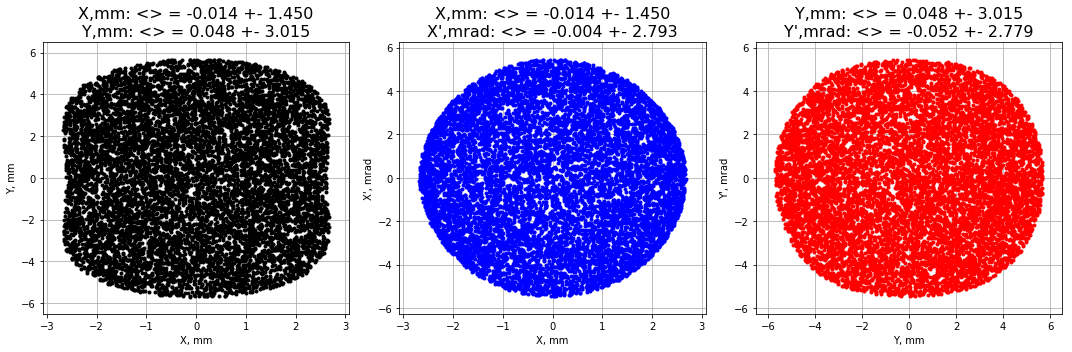

X,mm: <> = -0.0139621287053 +- 1.4497090939, X',mrad: <> = -0.00372039873485 +- 2.79291958842
Y,mm: <> = 0.048033489373 +- 3.01471419526, Y',mrad: <> = -0.0521769765792 +- 2.77935129722
Total minBeta = 0.160266386784 m (number = 147), MaxElem_length = 1.61 m (number = 156), maxSteps = 5 (number = 72)
'0' = 42, '1' = 122, '2' = 14, '3' = 1, '4' = 0, '5' = 1
Before 'get_linear_one_turn_map'...
after 'get_linear_one_turn_map'...

These distributions are after 2.0 turns:



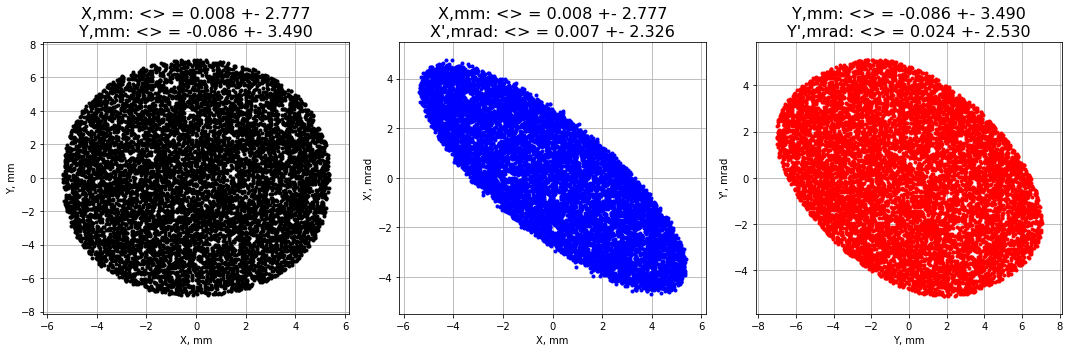

X,mm: <> = 0.00783974306627 +- 2.77682096336, X',mrad: <> = 0.00665105912739 +- 2.3260502421
Y,mm: <> = -0.0857831382317 +- 3.49008872416, Y',mrad: <> = 0.0237172765842 +- 2.53032367029

These distributions are after 8.0 turns:



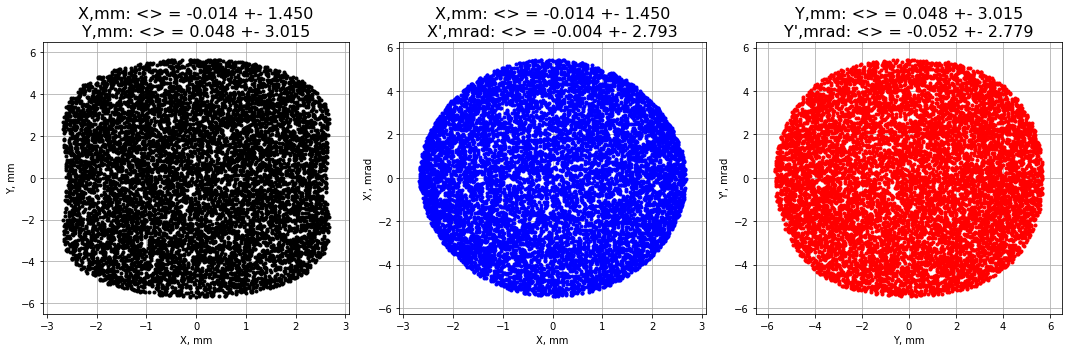

X,mm: <> = -0.0139441830722 +- 1.44985737492, X',mrad: <> = -0.00375622250334 +- 2.7928867249
Y,mm: <> = 0.048263647559 +- 3.01471206312, Y',mrad: <> = -0.0520860819255 +- 2.77935219831

These distributions are after 32.0 turns:



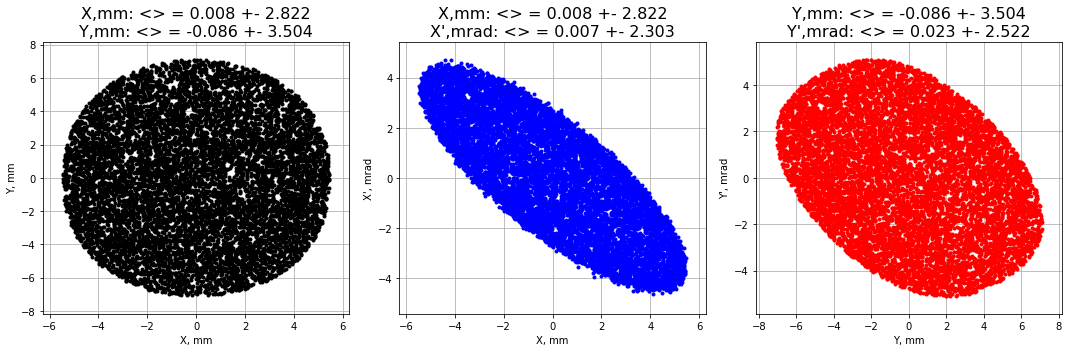

X,mm: <> = 0.00765190360782 +- 2.82173359941, X',mrad: <> = 0.00673855028033 +- 2.30282050349
Y,mm: <> = -0.0861962680582 +- 3.50422727066, Y',mrad: <> = 0.023067963622 +- 2.52195439742

These distributions are after 128.0 turns:



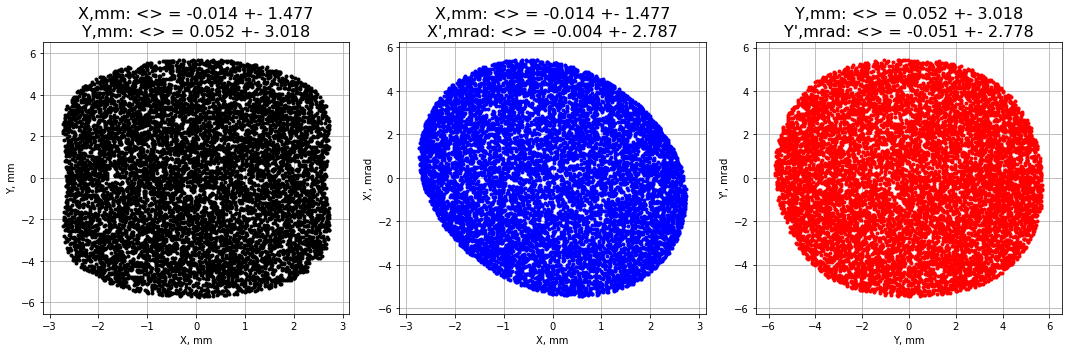

X,mm: <> = -0.013626974136 +- 1.47699624916, X',mrad: <> = -0.00432247106715 +- 2.78680484454
Y,mm: <> = 0.0518901807841 +- 3.01804897145, Y',mrad: <> = -0.0505732573147 +- 2.7778018831

These distributions are after 512.0 turns:



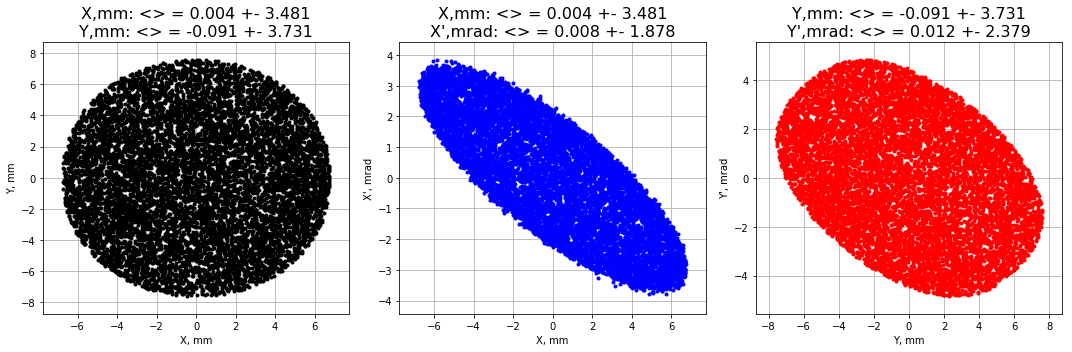

X,mm: <> = 0.00438915994048 +- 3.48109774503, X',mrad: <> = 0.00785104800895 +- 1.87770505817
Y,mm: <> = -0.091210480219 +- 3.73084791621, Y',mrad: <> = 0.0123206538925 +- 2.37890321157

These distributions are after 2048.0 turns:



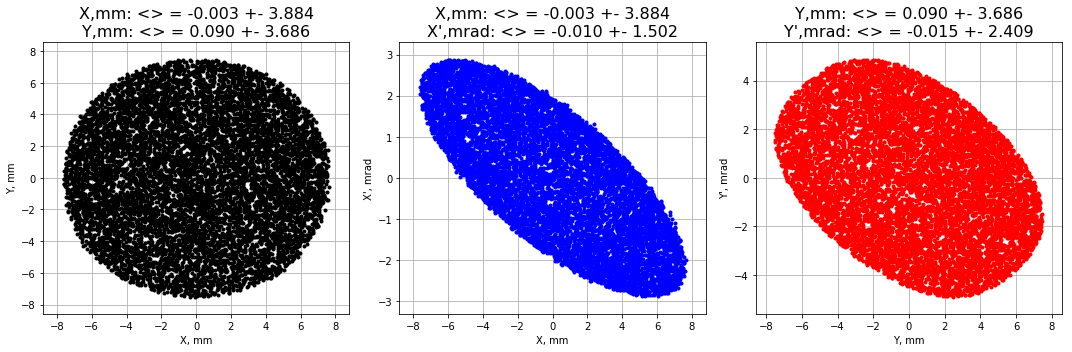

X,mm: <> = -0.0025424389297 +- 3.88373116754, X',mrad: <> = -0.0100229446276 +- 1.5017088464
Y,mm: <> = 0.0904491087935 +- 3.68600311864, Y',mrad: <> = -0.0145234991672 +- 2.40860892111

These distributions are after 8192.0 turns:



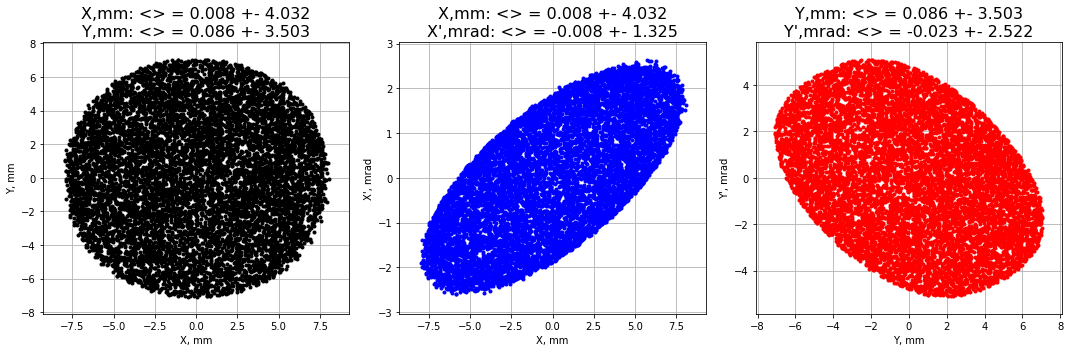

X,mm: <> = 0.00835349648251 +- 4.03236593112, X',mrad: <> = -0.00810166023371 +- 1.3253698716
Y,mm: <> = 0.0861728695976 +- 3.50341468284, Y',mrad: <> = -0.0231053106147 +- 2.52243707613

These distributions are after 32768.0 turns:



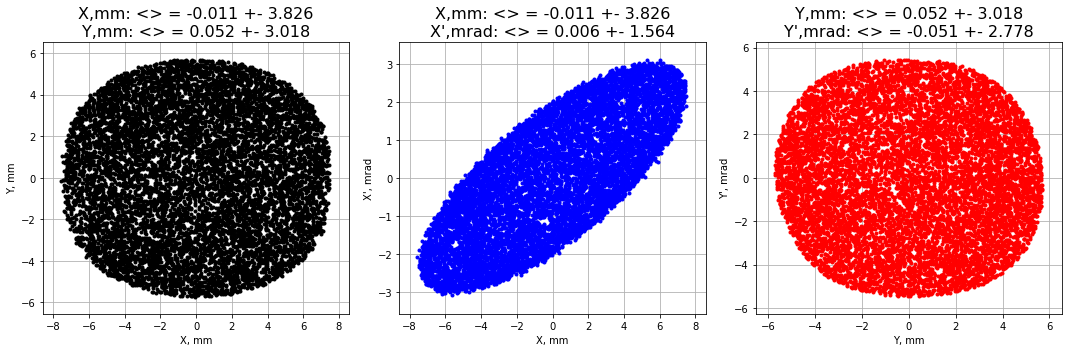

X,mm: <> = -0.0107091309769 +- 3.82592723784, X',mrad: <> = 0.0055635430478 +- 1.56350716357
Y,mm: <> = 0.0516849813841 +- 3.01768626676, Y',mrad: <> = -0.0506630254801 +- 2.77797044701


SystemExit: 

/home/vagrant/.pyenv/versions/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
#====================================================================
#
# YuE comment (04/11/19):
#
# Script realize approach to simulate IOTA bunch dynamics with changing of 
# parameters of the nonlinear elements after each defined number of turns.
#
# File 'multuNLsimulation_example.py' from directory
#              /home/vagrant/jupyter/eidelyur/iota
# was used as source to create this script.
#
#====================================================================
#
# Import and setup IPython magics:
#
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
#
# Synergia specific imports:
#
import rssynergia 
from rssynergia.base_diagnostics import read_bunch
from rssynergia.base_diagnostics import workflow
from rssynergia.base_diagnostics import lfplot
from rssynergia.base_diagnostics import plotbeam
from rssynergia.base_diagnostics import latticework
from rssynergia.base_diagnostics import basic_calcs
from rssynergia.base_diagnostics import pltbunch
from rssynergia.base_diagnostics import elliptic_sp
from rssynergia.base_diagnostics import options
from rssynergia.base_diagnostics import diagplot
from rssynergia.elliptic import elliptic_beam6d
import synergia
import synergia_workflow
from synergia_workflow import Options
import inspect

def next_break():
    selection = 'loop'
    while selection == 'loop':
        selection = raw_input('\nYour selection: next, break')
        print 'You selectiion is ', selection
        if (selection == 'next'):
            return 1
        if (selection == 'break'):
            return 2

def plotcoordDistr(Particles,numbParticles):
#    
# Plot X-X', Y-Y', and X-Y distributions for the first 'numbParticles' of the bunch 'Particles'
#
    newCoordinates = np.zeros((6,numbParticles))
    for k in range(numbParticles):
        for j in range(6):
            newCoordinates[j,k] = 1.e3*Particles[0,k,j]       # Units: mm and mrad 
    xmax = 1.15*np.max(newCoordinates[0,:])
    xpmax = 1.15*np.max(newCoordinates[1,:])
    ymax = 1.15*np.max(newCoordinates[2,:])
    ypmax = 1.15*np.max(newCoordinates[3,:])
    meanX = np.mean(newCoordinates[0,:])
    meanPX = np.mean(newCoordinates[1,:])
    stdX = np.std(newCoordinates[0,:])
    stdPX = np.std(newCoordinates[1,:])
    meanY = np.mean(newCoordinates[2,:])
    meanPY = np.mean(newCoordinates[3,:])
    stdY = np.std(newCoordinates[2,:])
    stdPY = np.std(newCoordinates[3,:])

    #another way - use gridspec
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1]) 
    
    ax0 = plt.subplot(gs[0])
    plt.plot(newCoordinates[0,:],newCoordinates[2,:],'.',color='k')
    x0Title = "X,mm: <> = {:.3f} +- {:.3f}\nY,mm: <> = {:.3f} +- {:.3f}".format(meanX,stdX,meanY,stdY)
    ax0.set_title(x0Title,fontsize='16')
    ax0.set_xlim([-xmax,xmax])
    ax0.set_ylim([-ymax,ymax])
    ax0.set_xlabel('X, mm')
    ax0.set_ylabel('Y, mm')
    ax0.grid(True)
    
    ax1 = plt.subplot(gs[1])
    plt.plot(newCoordinates[0,:],newCoordinates[1,:],'.',color='b')
    x1Title = "X,mm: <> = {:.3f} +- {:.3f}\nX\',mrad: <> = {:.3f} +- {:.3f}".format(meanX,stdX,meanPX,stdPX)
    ax1.set_title(x1Title,fontsize='16')
    ax1.set_xlim([-xmax,xmax])
    ax1.set_ylim([-xpmax,xpmax])
    ax1.set_xlabel('X, mm')
    ax1.set_ylabel('X\', mrad')
    ax1.grid(True)
    
    ax2 = plt.subplot(gs[2])
    plt.plot(newCoordinates[2,:],newCoordinates[3,:],'.',color='r')
    x2Title = "Y,mm: <> = {:.3f} +- {:.3f}\nY\',mrad: <> = {:.3f} +- {:.3f}".format(meanY,stdY,meanPY,stdPY)
    ax2.set_title(x2Title,fontsize='16')
    ax2.set_xlim([-ymax,ymax])
    ax2.set_ylim([-ypmax,ypmax])
    ax2.set_xlabel('Y, mm')
    ax2.set_ylabel('Y\', mrad')
    ax2.grid(True)
    
#    fig.canvas.set_window_title('Synergia Phase Space Distribution')
    fig.tight_layout()
    plt.show()
    return

def nTurnsMap(oneTurnMap,powerNturns):
#    
# Result is oneTurnMap^(2^powerNturns)
#
#    print "Input of nTurnsMap:"
#    print np.array2string (mapOneTurn,max_line_width = 200, precision = 5)
    turnsMap = oneTurnMap
    for power in range(powerNturns):
        mapCrrnt = turnsMap.dot(turnsMap)
        turnsMap = mapCrrnt
#    print "Output of nTurnsMap after {} turns:".format(math.pow(2,powerNturns))
#    print np.array2string (turnsMap,max_line_width = 200, precision = 5)
    return turnsMap    
    
def pullBunch(bunch,oneTurnMap,powerNturns):
#    
# Result is pulling of whole bunch particles through number of turns = 2^powerNturns,
# using oneTurnMap for each turn
#
    multiTurnsMap = nTurnsMap(oneTurnMap,powerNturns)
#
# Attention! The input object 'bunch' must be created as result of commands like
#    particlesCrrnt = elliptic_beam6d.toyellipticalbeam6D(optsCrrnt),
#    bunch = particlesCrrnt[index],
# but NOT as object after command like
#    bunch = synergia.optics.generate_matched_bunch_transverse(),
# because in this case object 'bunch' has no attribute 'len'
#
    nParticles = len(bunch)
    newBunch = np.zeros((nParticles,7))
    for partcl in range(nParticles):
        for i in range(6):
#            if partcl == 0:
#                print "i = {}".format(i)
            for j in range(6):
                newBunch[partcl,i] += bunch[partcl,j]*multiTurnsMap[j,i]
#                if partcl == 0:
#                    print "j = {}: oldBunch(0,j) = {}, map(j,i) = {}, newBunch(0,i) = {}". \
#                          format(j,bunch[partcl,j],multiTurnsMap[j,i],newBunch[partcl,i])
        newBunch[partcl,6] = bunch[partcl,6]
    return newBunch

def printBunch(bunch,nParticles):
#
# Print data for first 'nParticles' of the 'bunch' (which was created by method 
# 'elliptic_beam6d.toyellipticalbeam6D'); shape of array 'bunch' = (totalParticles,6) 
#
    print "Number of particles in the bunch = {}".format(len(bunch))
    for partcl in range(nParticles):
        print "Particle {}: x = {}, px = {}, y = {}, py = {}, s = {}, ps = {}, id = {}". \
            format(partcl,bunch[partcl,0],bunch[partcl,1],bunch[partcl,2],bunch[partcl,3], \
                   bunch[partcl,4],bunch[partcl,5],bunch[partcl,6])

def bunchParameters(bunch):
# Object 'bunch' has class with attribute 'base' as numpy.array(:,nParticles,0:7)
#
    arrayCoords = bunch.base
    meanXbunch = 1.e3*np.mean(arrayCoords[0,:,0])
    stdXbunch = 1.e3*np.std(arrayCoords[0,:,0])
    meanPXbunch = 1.e3*np.mean(arrayCoords[0,:,1])
    stdPXbunch = 1.e3*np.std(arrayCoords[0,:,1])
#    print "X,mm: <> = {} +- {}, X\',mrad: <> = {} +- {}". \
#          format(meanXbunch,stdXbunch,meanPXbunch,stdPXbunch)
    meanYbunch = 1.e3*np.mean(arrayCoords[0,:,2])
    stdYbunch = 1.e3*np.std(arrayCoords[0,:,2])
    meanPYbunch = 1.e3*np.mean(arrayCoords[0,:,3])
    stdPYbunch = 1.e3*np.std(arrayCoords[0,:,3])
#    print "Y,mm: <> = {} +- {}, Y\',mrad: <> = {} +- {}". \
#          format(meanYbunch,stdYbunch,meanPYbunch,stdPYbunch)
    return meanXbunch,stdXbunch,meanPXbunch,stdPXbunch,meanYbunch,stdYbunch,meanPYbunch,stdPYbunch

def particlesParameters(arrayCoords):
# Object 'arrayCoords' is numpy.array(nParticles,0:7)
#
    meanXbunch = 1.e3*np.mean(arrayCoords[:,0])
    stdXbunch = 1.e3*np.std(arrayCoords[:,0])
    meanPXbunch = 1.e3*np.mean(arrayCoords[:,1])
    stdPXbunch = 1.e3*np.std(arrayCoords[:,1])
#    print "X,mm: <> = {} +- {}, X\',mrad: <> = {} +- {}". \
#          format(meanXbunch,stdXbunch,meanPXbunch,stdPXbunch)
    meanYbunch = 1.e3*np.mean(arrayCoords[:,2])
    stdYbunch = 1.e3*np.std(arrayCoords[:,2])
    meanPYbunch = 1.e3*np.mean(arrayCoords[:,3])
    stdPYbunch = 1.e3*np.std(arrayCoords[:,3])
#    print "Y,mm: <> = {} +- {}, Y\',mrad: <> = {} +- {}". \
#          format(meanYbunch,stdYbunch,meanPYbunch,stdPYbunch)
    return meanXbunch,stdXbunch,meanPXbunch,stdPXbunch,meanYbunch,stdYbunch,meanPYbunch,stdPYbunch

def printAttributes(object,name,title):
#
# List of all attributes of 'object' for checking:
#
    attrList = inspect.getmembers(object)
    strTitle = "\nattrList ("+name+" = "+title+"):\n{}\n"
    print strTitle.format(attrList)
#
#
# Names of the structures:
#
nameStruct = []
numbStruct = 2
for n in range(numbStruct):
    nameStruct.append('nlnr'+str(n)+'_IO_82')
# Checking:
for n in range(numbStruct):
    print 'nameStrct[{}] = {}'.format(n,nameStruct[n])
#    
# Import of lattices from MADX files:
#
lattices = {}
# Dictionary of lattices:
lattice_repo = '/home/vagrant/jupyter/eidelyur/iota/'

for n in range(numbStruct):
    nameCrrnt = nameStruct[n]
    if (n == 0):
        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_center.madx" #centered t1 8.2 1IO lattice
    if (n == 1):
#        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_nll_center.madx" #centered t1 8.2 1IO lattice
        lattices[nameCrrnt] = lattice_repo + "lattice_1IO_center.madx" #centered t1 8.2 1IO lattice
# Checking:
for n in range(numbStruct):
    nameCrrnt = nameStruct[n]
    print 'lattices[{}] = {}'.format(nameCrrnt,lattices[nameCrrnt])
#
# Some global parameters:
#
nsteps_per_element = 5
order = 1
output_dir = 'example_run'
workflow.make_path(output_dir)
numbMacroPrtcls = 10000
tval = 0.4         # elliptic strength parameter
cval = 0.01        # aperture parameter
init_tune = 0.3
lnl_length = 1.8   # m
nSegmnt = 20
# We want the normalized emittance in x to be 0.3 mm-mrad
init_norm_emittance = 0.3*1.e-6
turns_per_structure = 100

#
# Some flags (plot, if =1):
#
plotBunchFlag = 1
plotCoordinatesFlag = 1
plotStructureFlag = 0
checkStructuresFlag = 1

if checkStructuresFlag == 1:
#
# Loop over all structures for its checking:
#
#    for n in range(numbStruct):
    for n in range(2):
        nameCrrnt = nameStruct[n]
        latticeCrrnt = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameCrrnt])

        for elem in latticeCrrnt.get_elements():
            if elem.get_type() == 'nllens':
                elem.set_string_attribute("extractor_type", "chef_propagate")
            else:
                elem.set_string_attribute("extractor_type", "chef_map") 
        nstepsCrrnt = len(latticeCrrnt.get_elements())*nsteps_per_element
        if n == 0:
            optsCrrnt = workflow.make_opts(nameCrrnt, order, output_dir, nstepsCrrnt, nsteps_per_element)
#    
# List of all attributes of optsCrrnt for checking:    
#
#            printAttributes(optsCrrnt,'optsCrrnt','workflow.make_opts')
#
            optsCrrnt.macro_particles = numbMacroPrtcls
            optsCrrnt.steps_per_element = nsteps_per_element
            stepperCrrnt = synergia.simulation.Independent_stepper_elements \
                           (latticeCrrnt, optsCrrnt.map_order, optsCrrnt.steps_per_element)
            lattice_simulatorCrrnt = stepperCrrnt.get_lattice_simulator()
# Plotting of the structure:
            optsCrrnt.lattice_name = 'IOTA 8-2: file '+ lattices[nameCrrnt]
            optsCrrnt.ID = None
            optsCrrnt.path = None
            optsCrrnt.output_dir = output_dir
            optsCrrnt.turns = turns_per_structure 
            optsCrrnt.variance = 0.5
            optsCrrnt.lattice_simulator = lattice_simulatorCrrnt
            optsCrrnt.relpath = output_dir
            optsCrrnt.lf_fns = ['beta_x','beta_y','D_x']
            optsCrrnt.lattice = latticeCrrnt
            optsCrrnt.save = False
            optsCrrnt.scale = 2
            if (plotStructureFlag == 1):
                lfplot.plot_sliced_lattice_functions(optsCrrnt)
# Data to construct a matched bunch:    
            ref = latticeCrrnt.get_reference_particle()
            beta = ref.get_beta()
            gamma = ref.get_gamma()
            optsCrrnt.norm_emittance = init_norm_emittance
            optsCrrnt.emitx = basic_calcs.calc_geometric_emittance \
                              (optsCrrnt.norm_emittance, beta, gamma)
            optsCrrnt.emity = optsCrrnt.emitx
#    
# List of all attributes of optsCrrnt for checking:    
#
#            printAttributes(optsCrrnt,'Again optsCrrnt','workflow.make_opts')
# Construct a matched bunch:
            myBunch = synergia.optics.generate_matched_bunch_transverse \
                      (lattice_simulatorCrrnt, optsCrrnt.emitx, optsCrrnt.emity, optsCrrnt.stdz, \
                       optsCrrnt.dpop,optsCrrnt.real_particles,optsCrrnt.macro_particles,optsCrrnt.seed) 
#    
# List of all attributes of myBunch for checking:    
#
#            printAttributes(myBunch,'myBuncht','synergia.optics.generate_matched_bunch_transverse')
# Plot a matched bunch:
            if (plotBunchFlag == 1):
                loclTitle = "\nThese distributions were constructed using \
'synergia.optics.generated_bunch_transverse' method:\n"
                print loclTitle
                pltbunch.plot_bunch(myBunch)      # Plotting of x-y, x-px and y-py distributions
# Data to calculate the parameters of nonlinear element::
        optsCrrnt.t = tval                # will use for any n
        optsCrrnt.c = cval                # will use for any n
        optsCrrnt.lnll = lnl_length       # will use for any n
        optsCrrnt.nseg = nSegmnt          # will use for any n
        optsCrrnt.new_tune = init_tune    # will use for n=0 only!
#        
# Construct the nonlinear element
# Attention: for n > 1 it is necessary to redefine the parameter optsCrrnt.new_tune;
# Method returns: f0, betae,alphae,betas:
# f0 - focal length, betae - entrance beta function, alphae - entrance alpha function,
# betas - middle beta function
#
        vals = basic_calcs.get_base_nll(optsCrrnt.lnll, optsCrrnt.new_tune, optsCrrnt.t, optsCrrnt.c)
#
# Using of parameters of nonlinear element to generate a toy costing beam with fixed 
# elliptical Hamiltonian and returns the particle array, while also saving the array to
# a text file. Coordinates are chosen with fixed random number generator seed, so that they
# should always produce the same initial distribution for a given emittance.
#   
        optsCrrnt.betae = vals[3]
        optsCrrnt.alphae = 0 #fixed 0 alpha for center
        optsCrrnt.beta0 = vals[3]
        optsCrrnt.emits = [9.74e-6]
        optsCrrnt.lattice = latticeCrrnt
        optsCrrnt.quiet = False  
        particlesCrrnt = elliptic_beam6d.toyellipticalbeam6D(optsCrrnt)
# Plot a toy beam (x-x', y-y', x-y coordinates):
#        if (plotCoordinatesFlag == 1):
#            loclTitle = "\nThese distributions were constructed using \
# 'elliptic_beam6d.toyellipticalbeam6D' method:\n"
#            print loclTitle
#            plotcoordDistr(particlesCrrnt,numbMacroPrtcls)
# Construct a toyheader for quick calculation of bunch properties
        toyheader = {}
        toyheader['s_val'] = 0.
        optsCrrnt.lattice_simulator = lattice_simulatorCrrnt  
        for index in range(len(optsCrrnt.emits)):
            bunchCrrnt = particlesCrrnt[index]
            if n == 0:
                firstBunch = bunchCrrnt
#    
# List of all attributes of 'firstBunch' for checking:    
#
#                printAttributes(firstBunch,'firstBunch','particlesCrrnt[index]')
#                printBunch(bunchCrrnt,10)

# For checking only:
#                shapeFirstBunch = firstBunch.shape
#                print "shapFirstBunch = {}, len = {}".format(shapeFirstBunch,len(shapeFirstBunch))
#                bunchPartcls = shapeFirstBunch[0]
#                print "bunchPartcls = {}".format(bunchPartcls)
##                arrayCoords = firstBunch.base
# For checking only:
#                print "arrayCoords = {}".format(arrayCoords)
#                shapeArrayCoords = arrayCoords.shape
#                print "shapArrayCoords = {}, len = {}".format(shapeArrayCoords,len(shapeArrayCoords))
#                for prtcl in range(10):
#                    print "Particle {}: x = {}, px = {}, y = {}, py = {}". \
#                        format(prtcl,arrayCoords[0,prtcl,0],arrayCoords[0,prtcl,1], \
#                               arrayCoords[0,prtcl,2],arrayCoords[0,prtcl,3])
##                meanXfirstBunch = 1.e3*np.mean(arrayCoords[0,:,0])
##                stdXfirstBunch = 1.e3*np.std(arrayCoords[0,:,0])
##                meanPXfirstBunch = 1.e3*np.mean(arrayCoords[0,:,1])
##                stdPXfirstBunch = 1.e3*np.std(arrayCoords[0,:,1])
##                print "X,mm: <> = {} +- {}, X\',mrad: <> = {} +- {}". \
##                      format(meanXfirstBunch,stdXfirstBunch,meanPXfirstBunch,stdPXfirstBunch)
##                meanYfirstBunch = 1.e3*np.mean(arrayCoords[0,:,2])
##                stdYfirstBunch = 1.e3*np.std(arrayCoords[0,:,2])
##                meanPYfirstBunch = 1.e3*np.mean(arrayCoords[0,:,3])
##                stdPYfirstBunch = 1.e3*np.std(arrayCoords[0,:,3])
##                print "Y,mm: <> = {} +- {}, Y\',mrad: <> = {} +- {}". \
##                      format(meanYfirstBunch,stdYfirstBunch,meanPYfirstBunch,stdPYfirstBunch)

            initialH,initialI = elliptic_sp.calc_bunch_H(bunchCrrnt,optsCrrnt)
            bunch_mean = np.mean(initialH)
            bunch_std = np.std(initialH)
            bunch_var = (bunch_std/bunch_mean)*100
            print "Constructed bunch with {} macroparticles, having mean H: {} and std: {}%". \
                  format(optsCrrnt.macro_particles, bunch_mean,bunch_var)
# now add longitudinal momentum variation
# For random samples with mean = 0, sigma = sigma, use sigma*np.random.randn(...)
            bunchCrrnt[:,5] = optsCrrnt.dpop*np.random.randn(1,len(bunchCrrnt))
# bunch[:,5] = np.zeros(len(bunch)) #0 dpop

            optsCrrnt.num_total_particles = optsCrrnt.macro_particles*len(optsCrrnt.emits)
            optsCrrnt.tracked_particles = optsCrrnt.num_total_particles
        particles_file = '{}/myBunch.txt'.format(optsCrrnt.output_dir)

        np.savetxt(particles_file,bunchCrrnt)            #  write the bunch to a text file
        bucket_length = beta*latticeCrrnt.get_length()/4 # RF harmonic number is 4

        commCrrnt = synergia.utils.Commxx(True)          # define a communicator
        myBunch = read_bunch.read_bunch(particles_file,ref,optsCrrnt.real_particles, \
                                        commCrrnt,bucket_length)
#        if (plotBunchFlag == 1):
#            loclTitle = "\nThese distributions were constructed using \
# 'read_bunch.read_bunch' = 'elliptic_beam6d.toyellipticalbeam6D' methods:\n"
#            print loclTitle
#            pltbunch.plot_bunch(myBunch)                    # Plotting of x-y, x-px and y-py distributions     

#        if (plotCoordinatesFlag == 1):
#            loclTitle = "\nThese distributions were constructed using \
# 'elliptic_beam6d.toyellipticalbeam6D' method:\n"
#            print loclTitle
#            plotcoordDistr(particlesCrrnt,numbMacroPrtcls)  # Plotting of x-px, y-py and x-y distributions

#============================#
#                            #
# Perform a basic simulation #
#                            #
#============================#

# We will run our matched beam through the nonlinear lattice for 100 turns for each 
# structure, outputing individual particle coordinates (Diagnostics_particles) each turn
# and basic RMS bunch properties (Diagnostics_basic) each step (slice) of the simulation.

turns_per_structure = 100

#
# Construct a matched bunch (before first structure):
#
nameFirstStrctr = nameStruct[0]
latticeFirstStrctr = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameFirstStrctr])
for elem in latticeFirstStrctr.get_elements():
    if elem.get_type() == 'nllens':
        elem.set_string_attribute("extractor_type", "chef_propagate")
    else:
        elem.set_string_attribute("extractor_type", "chef_map") 
nstepsFirstStrctr = len(latticeFirstStrctr.get_elements())*nsteps_per_element
optsFirstStrctr = workflow.make_opts(nameFirstStrctr,order,output_dir,nstepsFirstStrctr,nsteps_per_element)
optsFirstStrctr.macro_particles = numbMacroPrtcls
optsFirstStrctr.steps_per_element = nsteps_per_element
stepperMain = synergia.simulation.Independent_stepper_elements \
              (latticeFirstStrctr, optsFirstStrctr.map_order, optsFirstStrctr.steps_per_element)
lattice_simulatorMain = stepperMain.get_lattice_simulator()
# Plotting of the structure:
optsFirstStrctr.lattice_name = 'IOTA 8-2: file '+ lattices[nameFirstStrctr]
optsFirstStrctr.ID = None
optsFirstStrctr.path = None
optsFirstStrctr.turns = turns_per_structure 
optsFirstStrctr.variance = 0.5
optsFirstStrctr.lattice_simulator = lattice_simulatorMain
optsFirstStrctr.relpath = output_dir
optsFirstStrctr.lf_fns = ['beta_x','beta_y','D_x']
optsFirstStrctr.lattice = latticeFirstStrctr
optsFirstStrctr.save = False
optsFirstStrctr.scale = 2
# lfplot.plot_sliced_lattice_functions(optsFirstStrctr)
#
# Data to construct this bunch and buiding it:    
#
ref = latticeFirstStrctr.get_reference_particle()
beta = ref.get_beta()
gamma = ref.get_gamma()
optsFirstStrctr.norm_emittance = init_norm_emittance
optsFirstStrctr.emitx = basic_calcs.calc_geometric_emittance \
                        (optsFirstStrctr.norm_emittance, beta, gamma)
optsFirstStrctr.emity = optsFirstStrctr.emitx
comm = synergia.utils.Commxx(True) #define a communicator
# 
#  This method creats the object 'bunch' = firstBunch, which is not compatibled with YuE method 'pullBunch'!
#
# firstBunch = synergia.optics.generate_matched_bunch_transverse \
#             (lattice_simulatorMain,optsFirstStrctr.emitx, optsFirstStrctr.emity, optsFirstStrctr.stdz, \
#              optsFirstStrctr.dpop, optsFirstStrctr.real_particles,optsFirstStrctr.macro_particles, \
#              optsFirstStrctr.seed) 
#    
# List of all attributes of 'firstBunch' for checking:    
#
# printAttributes(firstBunch,'firstBunch','synergia.optics.generate_matched_bunch_transverse')

# 
# if (plotCoordinatesFlag == 1):
#    loclTitle = "\nThese distributions were constructed using \
# 'elliptic_beam6d.toyellipticalbeam6D' method:\n"
#    print loclTitle
#    plotcoordDistr(particlesCrrnt,numbMacroPrtcls)  # Plotting of x-px, y-py and x-y distributions

bunch_simulator = synergia.simulation.Bunch_simulator(myBunch)

print "Before main simulation"
for n in range(1):
    if n == 0:
        crrntBunch = firstBunch
# Plot this bunch:
        if (plotCoordinatesFlag == 1):
            loclTitle = "\nThese distributions are initial for pulling through the \
structures and were constructed using 'elliptic_beam6d.toyellipticalbeam6D' method:\n"
            print loclTitle
            plotcoordDistr(particlesCrrnt,numbMacroPrtcls)  # Plotting of x-px, y-py and x-y distributions
# Print this bunch:
#            printBunch(crrntBunch,10)
# Calculate and print main parameters of the particles distributions (object 'crrntBunch'):
            meanXbunch,stdXbunch,meanPXbunch,stdPXbunch, \
            meanYbunch,stdYbunch,meanPYbunch,stdPYbunch = bunchParameters(crrntBunch)
            print "X,mm: <> = {} +- {}, X\',mrad: <> = {} +- {}". \
                  format(meanXbunch,stdXbunch,meanPXbunch,stdPXbunch)
            print "Y,mm: <> = {} +- {}, Y\',mrad: <> = {} +- {}". \
                format(meanYbunch,stdYbunch,meanPYbunch,stdPYbunch)
    nameCrrnt = nameStruct[n]
    latticeCrrnt = synergia.lattice.MadX_reader().get_lattice("iota", lattices[nameCrrnt])
# --------------------------    
# Begin of my analysis of the lattice structure:
    numbElem = 0
    arcLength_old = 0.
    minBeta_total = 1.e10
    maxElem_length = 0.
    maxSteps_elem = 0
    nstep_0 = 0
    nstep_1 = 0
    nstep_2 = 0
    nstep_3 = 0
    nstep_4 = 0
    nstep_5 = 0
    for elem in latticeCrrnt.get_elements():
        if elem.get_type() == 'nllens':
            elem.set_string_attribute("extractor_type", "chef_propagate")
        else:
            elem.set_string_attribute("extractor_type", "chef_map") 
# 
# Definition of number of the steps for each element individual (step must be less then 
# minimal beta-function inside the element):
#
        numbElem += 1
        lattice_simulator_crrnt = synergia.simulation.Lattice_simulator(latticeCrrnt, 1)
        lattice_functions = lattice_simulator_crrnt.get_lattice_functions(elem)
#        elemName = lattice_functions.get_name
        arcLength = lattice_functions.arc_length 
        elemLength = arcLength - arcLength_old
        maxElem_length_new = max(maxElem_length,elemLength)
        if maxElem_length_new > maxElem_length:
            maxElem_length = maxElem_length_new
            numb_maxElem_length = numbElem
        arcLength_old = arcLength
        elemBeta_x = lattice_functions.beta_x
        elemBeta_y = lattice_functions.beta_y
        minBeta = min(elemBeta_x,elemBeta_y)
        minBeta_total_new = min(minBeta_total, minBeta)
        if minBeta_total_new < minBeta_total:
            minBeta_total = minBeta_total_new
            numb_minBeta_total = numbElem
#  For understanding:
#        print "Element {}: arc = {} m, length = {} m, beta_x = {} m, beta_y = {} m, minBeta = {} m". \
#              format(numbElem,arcLength,elemLength,elemBeta_x,elemBeta_y,minBeta)
#
# Selection of optimal step inside the element:
        if (elemLength == 0.):
            stepCrrnt = 0.
            nsteps_element = 0
        else:
            stepCrrnt = .75*minBeta
            nsteps_element = int(elemLength/stepCrrnt)+1
            stepCrrnt = elemLength/nsteps_element
        maxSteps_elem_new = max(maxSteps_elem,nsteps_element)
        if maxSteps_elem_new > maxSteps_elem:
            maxSteps_elem = maxSteps_elem_new
            numb_maxSteps_elem = numbElem
# For understanding:            
        if nsteps_element == 0:
            nstep_0 += 1
        if nsteps_element == 1:
            nstep_1 += 1
        if nsteps_element == 2:
            nstep_2 += 1
        if nsteps_element == 3:
            nstep_3 += 1
        if nsteps_element == 4:
            nstep_4 += 1
        if nsteps_element == 5:
            nstep_5 += 1
#        print "     Steps = {}, stepCrrnt = {} m". \
#              format(nsteps_element,stepCrrnt)
    print \
    "Total minBeta = {} m (number = {}), MaxElem_length = {} m (number = {}), maxSteps = {} (number = {})". \
          format(minBeta_total,numb_minBeta_total,maxElem_length,numb_maxElem_length, \
                 maxSteps_elem,numb_maxSteps_elem)
    print "'0' = {}, '1' = {}, '2' = {}, '3' = {}, '4' = {}, '5' = {}". \
          format (nstep_0,nstep_1,nstep_2,nstep_3,nstep_4,nstep_5)
# End of my analysis of the lattice structure
# -------------------------
    print "Before 'get_linear_one_turn_map'..."
    latticeSimulatorCrrnt = synergia.simulation.Lattice_simulator(latticeCrrnt, 1)
    mapOneTurn = latticeSimulatorCrrnt.get_linear_one_turn_map()
#    print "One Turn Map:"
#    print np.array2string (mapOneTurn,max_line_width = 200, precision = 5)
    print "after 'get_linear_one_turn_map'..."

    
    for powerTurns in range(1,16,2):
# Attention! Objects 'ccrntBunch' and 'newBunch' are chearacterized by different classes:        
        newBunch = pullBunch(crrntBunch,mapOneTurn,powerTurns)
# Print this bunch:
#        print "\nParticles after {} turns:\n".format(math.pow(2,powerTurns))
#        printBunch(newBunch,10)
# Select distributions of the particles from object 'newBunch':
        bunchPartcls = len(newBunch)
        partclsCrrnt = np.zeros((1,bunchPartcls,6))
        for partcl in range(bunchPartcls):
            partclsCrrnt[0,partcl,0:5] = newBunch[partcl,0:5]
# Plot these distributions:
        if (plotCoordinatesFlag == 1):
            loclTitle = "\nThese distributions are after {} turns:\n".format(math.pow(2,powerTurns))
            print loclTitle
            plotcoordDistr(partclsCrrnt,numbMacroPrtcls)  # Plotting of x-px, y-py and x-y distributions
# Calculate and print main parameters of the particles distributions (object 'newBunch'):
        meanXnewBunch,stdXnewBunch,meanPXnewBunch,stdPXnewBunch, \
        meanYnewBunch,stdYnewBunch,meanPYnewBunch,stdPYnewBunch = particlesParameters(newBunch)
        print "X,mm: <> = {} +- {}, X\',mrad: <> = {} +- {}". \
            format(meanXnewBunch,stdXnewBunch,meanPXnewBunch,stdPXnewBunch)
        print "Y,mm: <> = {} +- {}, Y\',mrad: <> = {} +- {}". \
            format(meanYnewBunch,stdYnewBunch,meanPYnewBunch,stdPYnewBunch)
        crrntBunch = newBunch

sys.exit()

